### Assignment 3 Fashion Minst Classification with ANNs and Visualizations

### 1. Load and Explore the Fashion MNIST Dataset

#### The fashion_mnist dataset is loaded using keras.datasets. Training and testing data are split into separate arrays (train_images, train_labels, test_images,test_labels) and the shape of the dataset is printed to understand the dimensions. A sample image is displayed to confirm the dataset is loaded correctly.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist # type: ignore

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


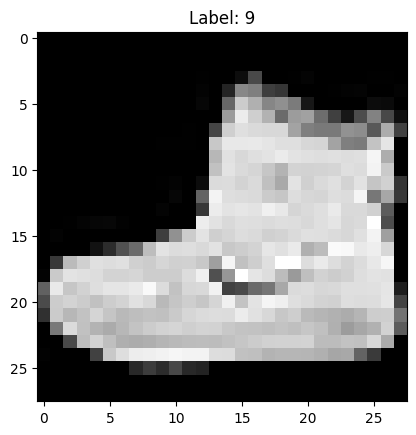

In [ ]:
# Display basic information
print("Training set shape:", train_images.shape)
print("Test set shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

# Display the first image and label
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

### 2. Data Preprocessing

#### Class names are defined for better readability of the labels. Occurances of each label are counted to check for class balance. Images are normalized by scaling pixel values to the range [0,1] to improve model convergence, images are reshaped to include a single channel, as required by the neural network.

In [2]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the first 10 labels with class names
for i in range(10):
    print(f"Label {train_labels[i]}: {class_names[train_labels[i]]}")

Label 9: Ankle boot
Label 0: T-shirt/top
Label 0: T-shirt/top
Label 3: Dress
Label 0: T-shirt/top
Label 2: Pullover
Label 7: Sneaker
Label 2: Pullover
Label 5: Sandal
Label 5: Sandal


In [3]:
# Count the occurrences of each class label in the training set
class_counts = np.bincount(train_labels)

# Display the count of samples for each class
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")

Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


In [4]:
# Scale the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Training set shape after reshaping:", train_images.shape)
print("Test set shape after reshaping:", test_images.shape)

Training set shape after reshaping: (60000, 28, 28, 1)
Test set shape after reshaping: (10000, 28, 28, 1)


### 3. Visualizations

#### Displaying a subset of training images along with thier class labels for exploratory anlaysis. Creating a bar chart showing the distribution of samples across classes. Computing and displaying the mean image for each class, providing insight into the average features of each category after that plotting the pixel value distrubution to visualize the intensity range.

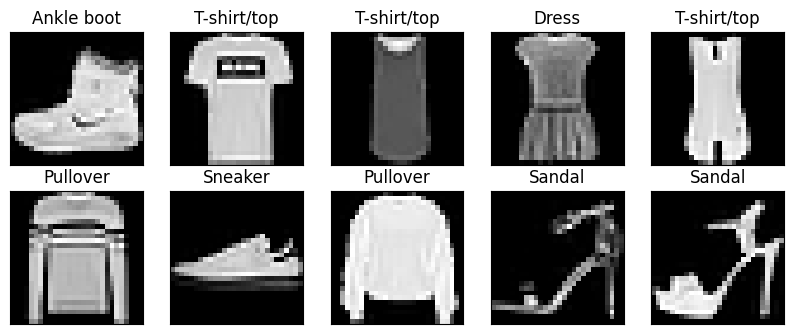

In [5]:
# Display 10 sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

C:\Users\Keshav Gautam\AppData\Local\Temp\ipykernel_15644\570721490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_labels_df, palette="viridis")


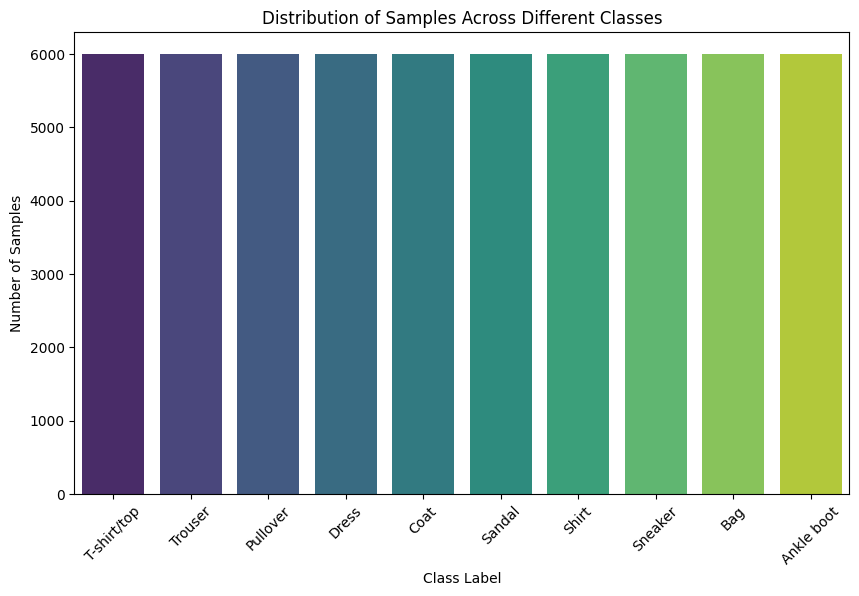

In [6]:
# Bar Chart for Class Distribution
import pandas as pd

# Convert labels to a DataFrame for easier plotting
train_labels_df = pd.DataFrame(train_labels, columns=['label'])

# Plotting the distribution of samples across different classes
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_labels_df, palette="viridis")
plt.title("Distribution of Samples Across Different Classes")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.show()

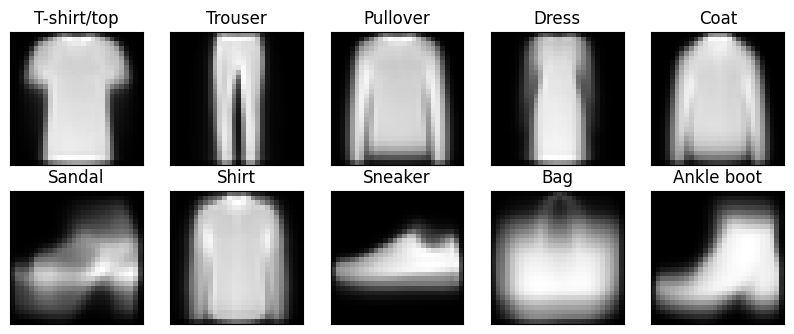

In [7]:
# Calculate the mean image for each class
mean_images = np.zeros((10, 28, 28))
for i in range(10):
    class_images = train_images[train_labels == i]
    mean_images[i] = class_images.mean(axis=0).reshape(28, 28)

# Display the mean images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(class_names[i])
plt.show()

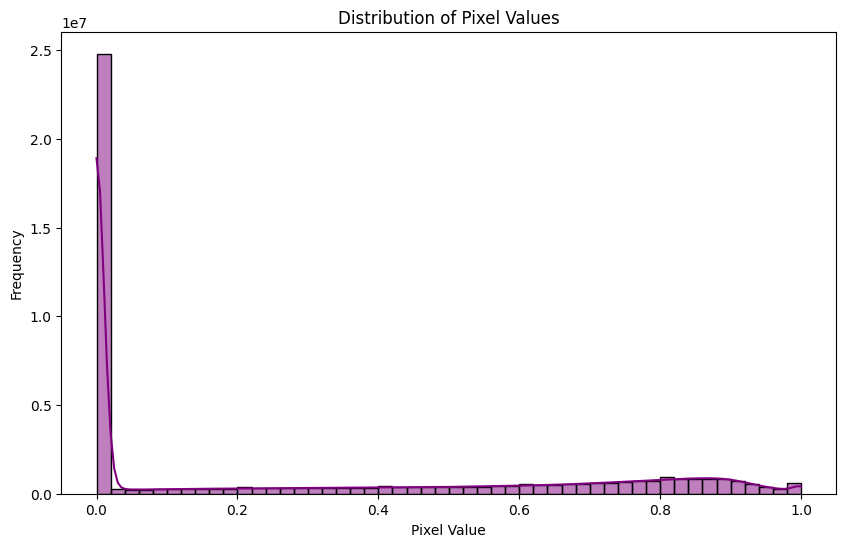

In [8]:
# Flatten the images to create a single array of pixel values
flattened_images = train_images.flatten()

# Plot the distribution of pixel values
plt.figure(figsize=(10, 6))
sns.histplot(flattened_images, bins=50, color='purple', kde=True)
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### 4. Building an Artificial Neural Network

#### Using keras.sequential to define a simple feedforward ANN model. The flatten layer converts 28*28 images into 1D arrays. Add a dense hidden layer with 128 neurons and ReLU activation for feature extraction. The output layer uses the softmax activation for multiclass classification.

In [9]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Flatten # type: ignore

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

c:\Users\Keshav Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 5. Compile the Model

#### Compiing the ANN with the Adam optimizer for adaptive learning. Used sparse_categorical_crossentrophyy as the loss function, which is suitable for integer-encoded labels. Tracked accuracy as the evaluation metric during training.

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 6. Training the Model

#### Trained the model on the training data, with 20% reserved for validation. Used a batch size of 128 for efficient training. Trained for 10 epochs to allow the model to learn from the data.

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.7927 - val_accuracy: 0.8441 - val_loss: 0.4506
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.4272 - val_accuracy: 0.8506 - val_loss: 0.4380
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8614 - loss: 0.3883 - val_accuracy: 0.8641 - val_loss: 0.3855
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3543 - val_accuracy: 0.8630 - val_loss: 0.3856
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.3391 - val_accuracy: 0.8717 - val_loss: 0.3621
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.3187 - val_accuracy: 0.8777 - val_loss: 0.3468
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.3095 - val_accuracy: 0.8695 - val_loss: 0.3599
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.3008 - val_accuracy: 0.

### 7. Evaluate the Model

#### Evaluated the trained model on the test dataset to measure performance. Plot accuract and loss trends during training and validation for insights into model behavior.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3603
Test accuracy: 0.8681


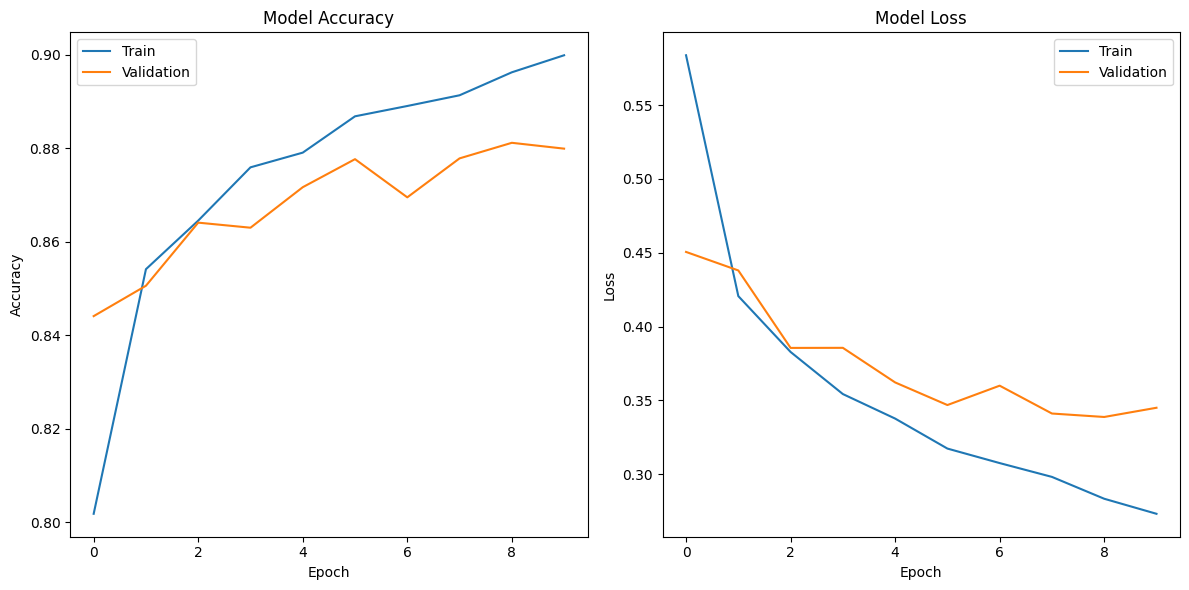

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [13]:

# Save the entire model to a HDF5 file
model.save('fashion_mnist_ann_model.h5')
print("Model saved successfully.")

Model saved successfully.


### CNN Model

#### Extend the model with convolutional layers for improved feature extraction.
#### Use ConV2D and MaxPooling2D layers to reduce spatial dimensions while preserving important features.
#### Dropout layers are added to reduce overfitting

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Keshav Gautam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training and Evaluation

#### Training the CNN model using the same configuration as the ANN

#### Evaluating the test accuracy to assess improvements over the ANN model

In [15]:
# Train the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Evaluate the CNN model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy after CNN training: {accuracy:.4f}")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7200 - loss: 0.8270 - val_accuracy: 0.8666 - val_loss: 0.3803
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8673 - loss: 0.3716 - val_accuracy: 0.8783 - val_loss: 0.3347
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8842 - loss: 0.3224 - val_accuracy: 0.8899 - val_loss: 0.3104
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8980 - loss: 0.2834 - val_accuracy: 0.8949 - val_loss: 0.2929
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9054 - loss: 0.2603 - val_accuracy: 0.9007 - val_loss: 0.2773
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9135 - loss: 0.2361 - val_accuracy: 0.9034 - val_loss: 0.2633
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9201 - loss: 0.2194 - val_accuracy: 0.9047 - val_loss: 0.2784
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9235 - loss: 0.2095 - val_acc

#### Save the CNN model for future use or deployment 

In [16]:
# Save the model
model.save('fashion_mnist_cnn_model.h5')

### 8. Test Set Prediction

#### Using trained model to predict labels for test images.
#### Displaying a subset of predictions along with true labels for manual verification

In [17]:
from keras.models import load_model
# Load the previously saved model
loaded_model = load_model('fashion_mnist_cnn_model.h5')

In [18]:

# Use the loaded model to predict classes for the test set
predictions = loaded_model.predict(test_images)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
# Function to display sample predictions

def display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples//2, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

     

# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

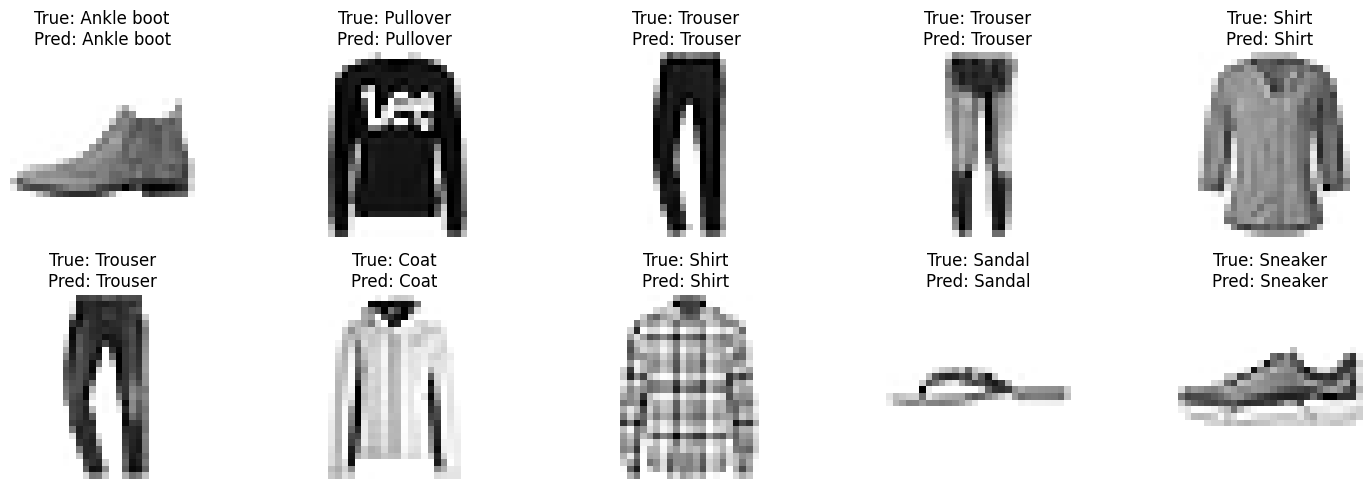

In [20]:
# Display sample predictions
display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10)

#### In this assignment, I successfully completed the classification of the Fashion MNIST dataset using both Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs), achieving a test accuracy of approximately 91% with CNNs. Through data preprocessing steps such as normalization and reshaping, and visualizations like class distributions and mean images, I gained valuable insights into the dataset. The performance improvement with CNNs demonstrated their effectiveness in capturing spatial features essential for image classification tasks. This assignment highlights the power of deep learning techniques and lays the groundwork for future improvements such as experimenting with advanced architectures or data augmentation.